# Pulizia set di dati Kaggle sulle partite della Serie A 2020-2025 

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

path = kagglehub.dataset_download("marcelbiezunski/serie-a-matches-dataset-2020-2025")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\franc\.cache\kagglehub\datasets\marcelbiezunski\serie-a-matches-dataset-2020-2025\versions\2


In [4]:
import pandas as pd
import os

path = r"C:\Users\franc\.cache\kagglehub\datasets\marcelbiezunski\serie-a-matches-dataset-2020-2025\versions\2"

nome_file_csv = "matches_seriea.csv"

# Costruzione del percorso completo
file_path = os.path.join(path, nome_file_csv)

df = pd.read_csv(
    file_path,              #Percorso file
    index_col=0,            #Indica a Pandas di utilizzare la prima colonna (quella con indice 0) del file CSV come indice di riga
    sep=',',                #Specifica il delimitatore utilizzato nel file per separare i valori
    on_bad_lines='skip',    #Questa operazione istruisce il programma di saltare una riga mal formata e continuare la lettura. Questo previene errori di caricamento e crash.
    engine='python'         #Specifica quale motore di parsing deve usare Pandas. Il motore 'python'
)

print("DataFrame caricato con successo e indice corretto:")
print("-" * 50)
print(df.head())

DataFrame caricato con successo e indice corretto:
--------------------------------------------------
         date   time     comp        round  day venue result   gf   ga  \
1  2025-08-23  20:45  Serie A  Matchweek 1  Sat  Home      L  1.0  2.0   
2  2025-08-29  20:45  Serie A  Matchweek 2  Fri  Away      W  2.0  0.0   
3  2025-09-14  20:45  Serie A  Matchweek 3  Sun  Home      W  1.0  0.0   
4  2025-09-20  20:45  Serie A  Matchweek 4  Sat  Away      W  3.0  0.0   
6  2025-09-28  20:45  Serie A  Matchweek 5  Sun  Home      W  2.0  1.0   

    opponent  ...  match report  notes    sh  sot  dist   fk pk pkatt season  \
1  Cremonese  ...  Match Report    NaN  24.0  5.0  15.5  0.0  0     0   2025   
2      Lecce  ...  Match Report    NaN  14.0  6.0  14.4  0.0  0     0   2025   
3    Bologna  ...  Match Report    NaN  14.0  3.0  16.0  0.0  0     0   2025   
4    Udinese  ...  Match Report    NaN  13.0  6.0  14.2  0.0  0     0   2025   
6     Napoli  ...  Match Report    NaN   6.0  3.0  14

In [5]:
print(df.columns.tolist())      #Restituisce tutti i nomi delle colonne del DataFrame

['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation', 'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'team']


In [6]:
# Mappa completa di conversione: 'Nome Colonna Inglese' : 'Nome Colonna Italiano'
mappa_colonne_completa = {
    'date': 'Data',
    'time': 'Ora',
    'comp': 'Competizione',
    'round': 'Giornata',
    'day': 'Giorno_Settimana',
    'venue': 'Sede', 
    'result': 'Risultato',
    'gf': 'Gol_Fatti',
    'ga': 'Gol_Subiti',
    'opponent': 'Avversario',
    'xg': 'Pronostico_Goals_Fatti', # xG
    'xga': 'Pronostico_Goals_Subiti', # xGA
    'poss': 'Possesso_Palla',
    'attendance': 'Spettatori',
    'captain': 'Capitano_Squadra',
    'formation': 'Formazione',
    'opp formation': 'Formazione_Avversaria',
    'referee': 'Arbitro',
    'match report': 'Report_Partita',
    'notes': 'Note',
    'sh': 'Tiri_Totali',
    'sot': 'Tiri_in_Porta',
    'dist': 'Distanza_Tiri_Media',
    'fk': 'Calci_Punizione',
    'pk': 'Rigori_Segnati',
    'pkatt': 'Rigori_Tentati',
    'season': 'Stagione',
    'team': 'Squadra'
}

# Applica la ridenominazione al DataFrame
# 'inplace=True' salva le modifiche direttamente in df
df.rename(columns=mappa_colonne_completa, inplace=True)

# Verifica i nuovi nomi delle colonne
print("✅ Tutti i 28 indici sono stati rinominati in italiano:")
print("-" * 70)
print(df.columns.tolist())
print("-" * 70)

✅ Tutti i 28 indici sono stati rinominati in italiano:
----------------------------------------------------------------------
['Data', 'Ora', 'Competizione', 'Giornata', 'Giorno_Settimana', 'Sede', 'Risultato', 'Gol_Fatti', 'Gol_Subiti', 'Avversario', 'Pronostico_Goals_Fatti', 'Pronostico_Goals_Subiti', 'Possesso_Palla', 'Spettatori', 'Capitano_Squadra', 'Formazione', 'Formazione_Avversaria', 'Arbitro', 'Report_Partita', 'Note', 'Tiri_Totali', 'Tiri_in_Porta', 'Distanza_Tiri_Media', 'Calci_Punizione', 'Rigori_Segnati', 'Rigori_Tentati', 'Stagione', 'Squadra']
----------------------------------------------------------------------


#### Come detto più sotto abbiamo scoperto un'incongruenza nel nome di una Squadra.
In avversario si chiama Inter ed in Squadra si chiama Internazionale.

In [8]:
df['Squadra'] = df['Squadra'].replace({'Internazionale':'Inter'})

In [9]:
#Creo un Match_ID per ogni partita
df['Match_ID'] = df.apply(lambda x: x['Data'] + '_' + '_'.join(sorted([x['Squadra'], x['Avversario']])), axis = 1)

In [10]:
#Ordino le partite per data e ora
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Nota: 'errors='coerce'' imposta a NaT (Not a Time) le stringhe che non sono date valide

df = df.sort_values(
    by=['Data', 'Ora'],  # Ordina prima per 'Data', poi per 'Ora'
    ascending=[True, True] # Entrambe in ordine crescente (dal più vecchio al più recente)
)

df.head()

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti,Gol_Subiti,Avversario,...,Note,Tiri_Totali,Tiri_in_Porta,Distanza_Tiri_Media,Calci_Punizione,Rigori_Segnati,Rigori_Tentati,Stagione,Squadra,Match_ID
0,2020-09-19,18:00,Serie A,Matchweek 1,Sat,Home,W,1.0,0.0,Torino,...,NaN,15.0,5.0,15.7,0.0,0,0,2020,Fiorentina,2020-09-19_Fiorentina_Torino
0,2020-09-19,18:00,Serie A,Matchweek 1,Sat,Away,L,0.0,1.0,Fiorentina,...,NaN,6.0,3.0,18.7,1.0,0,0,2020,Torino,2020-09-19_Fiorentina_Torino
0,2020-09-19,20:45,Serie A,Matchweek 1,Sat,Away,L,0.0,3.0,Hellas Verona,...,Match awarded to Hellas Verona,21.0,4.0,NaN,NaN,0,0,2020,Roma,2020-09-19_Hellas Verona_Roma
0,2020-09-19,20:45,Serie A,Matchweek 1,Sat,Home,W,3.0,0.0,Roma,...,Match awarded to Hellas Verona,8.0,3.0,NaN,NaN,0,0,2020,Hellas Verona,2020-09-19_Hellas Verona_Roma
0,2020-09-20,12:30,Serie A,Matchweek 1,Sun,Away,W,2.0,0.0,Parma,...,NaN,17.0,6.0,19.4,0.0,0,0,2020,Napoli,2020-09-20_Napoli_Parma


In [11]:
df['Squadra'].value_counts().sort_index() 

Squadra
Atalanta         195
Benevento         38
Bologna          195
Cagliari         157
Como              43
Cremonese         43
Crotone           38
Empoli           152
Fiorentina       195
Frosinone         38
Genoa            157
Hellas Verona    196
Inter            195
Juventus         195
Lazio            195
Lecce            119
Milan            195
Monza            114
Napoli           195
Parma             81
Pisa               5
Roma             195
Salernitana      114
Sampdoria        114
Sassuolo         157
Spezia           115
Torino           195
Udinese          195
Venezia           76
Name: count, dtype: int64

In [12]:
#Divido le partite in partite in casa e partite ospite
Casa = df[df['Sede'] == 'Home'].copy()
Ospite = df[df['Sede'] == 'Away'].copy()

In [13]:
#Modifico il nome della colonna capitano
Casa.rename(columns={'Capitano_Squadra':'Capitano'}, inplace = True)
Ospite.rename(columns={'Capitano_Squadra':'Capitano'}, inplace = True)

In [14]:
Df_Partite = pd.merge(Casa , Ospite, on = 'Match_ID')
Df_Partite.head()

,Data_x,Ora_x,Competizione_x,Giornata_x,Giorno_Settimana_x,Sede_x,Risultato_x,Gol_Fatti_x,Gol_Subiti_x,Avversario_x,...,Report_Partita_y,Note_y,Tiri_Totali_y,Tiri_in_Porta_y,Distanza_Tiri_Media_y,Calci_Punizione_y,Rigori_Segnati_y,Rigori_Tentati_y,Stagione_y,Squadra_y
0,2020-09-19,18:00,Serie A,Matchweek 1,Sat,Home,W,1.0,0.0,Torino,...,Match Report,NaN,6.0,3.0,18.7,1.0,0,0,2020,Torino
1,2020-09-19,20:45,Serie A,Matchweek 1,Sat,Home,W,3.0,0.0,Roma,...,Match Report,Match awarded to Hellas Verona,21.0,4.0,NaN,NaN,0,0,2020,Roma
2,2020-09-20,12:30,Serie A,Matchweek 1,Sun,Home,L,0.0,2.0,Napoli,...,Match Report,NaN,17.0,6.0,19.4,0.0,0,0,2020,Napoli
3,2020-09-20,15:00,Serie A,Matchweek 1,Sun,Home,W,4.0,1.0,Crotone,...,Match Report,NaN,13.0,3.0,18.8,0.0,0,0,2020,Crotone
4,2020-09-20,18:00,Serie A,Matchweek 1,Sun,Home,D,1.0,1.0,Cagliari,...,Match Report,NaN,8.0,4.0,15.9,1.0,0,0,2020,Cagliari


In [15]:
# Dizionario di mappatura per le colonne che hanno un suffisso x or y
mappa_rinomina = {
    # Colonne _x (Squadra Principale/Casa)
    'Data_x': 'Data',
    'Ora_x': 'Ora',
    'Competizione_x': 'Competizione',
    'Giornata_x': 'Giornata',
    'Giorno_Settimana_x': 'Giorno_Settimana',
    'Sede_x': 'Sede',
    'Risultato_x': 'Risultato',
    'Gol_Fatti_x': 'Gol_Fatti_Casa',
    'Gol_Subiti_x': 'Gol_Subiti_Casa',
    'Avversario_x': 'Avversario_Nome', # Rinomina l'Avversario registrato dal punto di vista della squadra X
    'Pronostico_Goals_Fatti_x': 'Pronostico_Goals_Fatti_Casa',
    'Pronostico_Goals_Subiti_x': 'Pronostico_Goals_Subiti_Casa',
    'Possesso_Palla_x': 'Possesso_Palla_Casa',
    'Spettatori_x': 'Spettatori', # Spettatori è lo stesso per entrambi i lati
    'Capitano_x': 'Capitano_Casa',
    'Formazione_x': 'Formazione_Casa',
    'Formazione_Avversaria_x': 'Formazione_Avversaria', # La formazione Avversaria vista da X
    'Arbitro_x': 'Arbitro',
    'Report_Partita_x': 'Report_Partita',
    'Note_x': 'Note',
    'Tiri_Totali_x': 'Tiri_Totali_Casa',
    'Tiri_in_Porta_x': 'Tiri_in_Porta_Casa',
    'Distanza_Tiri_Media_x': 'Distanza_Tiri_Media_Casa',
    'Calci_Punizione_x': 'Calci_Punizione_Casa',
    'Rigori_Segnati_x': 'Rigori_Segnati_Casa',
    'Rigori_Tentati_x': 'Rigori_Tentati_Casa',
    'Stagione_x': 'Stagione',
    'Squadra_x': 'Squadra_Casa', # La squadra di cui si registrano le statistiche _x

    # Colonne _y (Avversario/Ospite - Queste sono le statistiche dell'Avversario relative al Match_ID)
    'Data_y': 'Data_Avversario', # Manteniamo se utile, ma spesso sono ridondanti con Data_x
    'Ora_y': 'Ora_Avversario',
    'Competizione_y': 'Competizione_Avversario',
    'Giornata_y': 'Giornata_Avversario',
    'Giorno_Settimana_y': 'Giorno_Settimana_Avversario',
    'Sede_y': 'Sede_Avversario',
    'Risultato_y': 'Risultato_Avversario',
    'Gol_Fatti_y': 'Gol_Fatti_Ospite', # Questi sono i gol fatti dall'avversario
    'Gol_Subiti_y': 'Gol_Subiti_Ospite',
    'Avversario_y': 'Squadra_Avversaria', # Rinomina l'Avversario registrato dal punto di vista della squadra Y (che è la Squadra_x)
    'Pronostico_Goals_Fatti_y': 'Pronostico_Goals_Fatti_Ospite',
    'Pronostico_Goals_Subiti_y': 'Pronostico_Goals_Subiti_Ospite',
    'Possesso_Palla_y': 'Possesso_Palla_Ospite',
    'Spettatori_y': 'Spettatori_Avversario',
    'Capitano_y': 'Capitano_Ospite',
    'Formazione_y': 'Formazione_Ospite',
    'Formazione_Avversaria_y': 'Formazione_Avversaria_Vista_Ospite',
    'Arbitro_y': 'Arbitro_Avversario',
    'Report_Partita_y': 'Report_Partita_Avversario',
    'Note_y': 'Note_Avversario',
    'Tiri_Totali_y': 'Tiri_Totali_Ospite',
    'Tiri_in_Porta_y': 'Tiri_in_Porta_Ospite',
    'Distanza_Tiri_Media_y': 'Distanza_Tiri_Media_Ospite',
    'Calci_Punizione_y': 'Calci_Punizione_Ospite',
    'Rigori_Segnati_y': 'Rigori_Segnati_Ospite',
    'Rigori_Tentati_y': 'Rigori_Tentati_Ospite',
    'Stagione_y': 'Stagione_Avversario',
    'Squadra_y': 'Squadra_Ospite', # La squadra di cui si registrano le statistiche _y
}

In [16]:
Df_Partite = Df_Partite.rename(columns=mappa_rinomina)

print("Nomi delle colonne aggiornati:")
print(Df_Partite.columns.tolist())

Nomi delle colonne aggiornati:
['Data', 'Ora', 'Competizione', 'Giornata', 'Giorno_Settimana', 'Sede', 'Risultato', 'Gol_Fatti_Casa', 'Gol_Subiti_Casa', 'Avversario_Nome', 'Pronostico_Goals_Fatti_Casa', 'Pronostico_Goals_Subiti_Casa', 'Possesso_Palla_Casa', 'Spettatori', 'Capitano_Casa', 'Formazione_Casa', 'Formazione_Avversaria', 'Arbitro', 'Report_Partita', 'Note', 'Tiri_Totali_Casa', 'Tiri_in_Porta_Casa', 'Distanza_Tiri_Media_Casa', 'Calci_Punizione_Casa', 'Rigori_Segnati_Casa', 'Rigori_Tentati_Casa', 'Stagione', 'Squadra_Casa', 'Match_ID', 'Data_Avversario', 'Ora_Avversario', 'Competizione_Avversario', 'Giornata_Avversario', 'Giorno_Settimana_Avversario', 'Sede_Avversario', 'Risultato_Avversario', 'Gol_Fatti_Ospite', 'Gol_Subiti_Ospite', 'Squadra_Avversaria', 'Pronostico_Goals_Fatti_Ospite', 'Pronostico_Goals_Subiti_Ospite', 'Possesso_Palla_Ospite', 'Spettatori_Avversario', 'Capitano_Ospite', 'Formazione_Ospite', 'Formazione_Avversaria_Vista_Ospite', 'Arbitro_Avversario', 'Report_P

In [17]:
# Per pulizia, eliminiamo le colonne ridondanti,
# come le doppie colonne per Data, Ora, Competizione, Giornata, Arbitro, ecc.
# Ad esempio, le colonne '_Avversario' (che sono duplicate di quelle senza suffisso)
colonne_da_eliminare = [
    'Data_Avversario', 'Ora_Avversario', 'Competizione_Avversario',
    'Giornata_Avversario', 'Giorno_Settimana_Avversario', 'Sede_Avversario',
    'Risultato_Avversario', 'Spettatori_Avversario', 'Arbitro_Avversario',
    'Report_Partita_Avversario', 'Note_Avversario', 'Stagione_Avversario',
    'Squadra_Avversaria','Avversario_Nome',
]

# Rimuovi le colonne duplicate
Df_Partite = Df_Partite.drop(columns=colonne_da_eliminare, errors='ignore')

In [18]:
Df_Partite.columns.tolist()

['Data',
 'Ora',
 'Competizione',
 'Giornata',
 'Giorno_Settimana',
 'Sede',
 'Risultato',
 'Gol_Fatti_Casa',
 'Gol_Subiti_Casa',
 'Pronostico_Goals_Fatti_Casa',
 'Pronostico_Goals_Subiti_Casa',
 'Possesso_Palla_Casa',
 'Spettatori',
 'Capitano_Casa',
 'Formazione_Casa',
 'Formazione_Avversaria',
 'Arbitro',
 'Report_Partita',
 'Note',
 'Tiri_Totali_Casa',
 'Tiri_in_Porta_Casa',
 'Distanza_Tiri_Media_Casa',
 'Calci_Punizione_Casa',
 'Rigori_Segnati_Casa',
 'Rigori_Tentati_Casa',
 'Stagione',
 'Squadra_Casa',
 'Match_ID',
 'Gol_Fatti_Ospite',
 'Gol_Subiti_Ospite',
 'Pronostico_Goals_Fatti_Ospite',
 'Pronostico_Goals_Subiti_Ospite',
 'Possesso_Palla_Ospite',
 'Capitano_Ospite',
 'Formazione_Ospite',
 'Formazione_Avversaria_Vista_Ospite',
 'Tiri_Totali_Ospite',
 'Tiri_in_Porta_Ospite',
 'Distanza_Tiri_Media_Ospite',
 'Calci_Punizione_Ospite',
 'Rigori_Segnati_Ospite',
 'Rigori_Tentati_Ospite',
 'Squadra_Ospite']

#### Dopo l'unione ho notato che avevamo solo 1756 accoppiamenti e non 1951.
Con df['Squadra'].value_counts().sort_index() abbiamo trovato il i nomi di tutte le Squadre (Casa) ed abbiamo scoperto che l'Inter era memorizzato con Internazionale

In [20]:
Df_Partite.info()      #Fornisce un riepilogo sui tipi di dati e sulla presenza di valori mancanti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Data                                1951 non-null   datetime64[ns]
 1   Ora                                 1951 non-null   object        
 2   Competizione                        1951 non-null   object        
 3   Giornata                            1951 non-null   object        
 4   Giorno_Settimana                    1951 non-null   object        
 5   Sede                                1951 non-null   object        
 6   Risultato                           1951 non-null   object        
 7   Gol_Fatti_Casa                      1951 non-null   float64       
 8   Gol_Subiti_Casa                     1951 non-null   float64       
 9   Pronostico_Goals_Fatti_Casa         1950 non-null   float64       
 10  Pronostico_Goals_Subiti_

In [21]:
Df_Partite.describe(include="all")     #Fornisce una visione statistica completa di tutto il DataFrame (include='all' estende anche alle colonne non numeriche)

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,...,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite
count,1951,1951,1951,1951,1951,1951,1951,1951.000000,1951.000000,1950.000000,...,1951,1951,1951,1951.000000,1951.000000,1948.000000,1950.000000,1951.000000,1951.000000,1951
unique,NaN,21,1,39,7,1,3,NaN,NaN,NaN,...,211,19,18,NaN,NaN,NaN,NaN,NaN,NaN,29
top,NaN,20:45,Serie A,Matchweek 1,Sun,Home,W,NaN,NaN,NaN,...,Lorenzo Pellegrini,3-5-2,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,Hellas Verona
freq,NaN,714,1951,60,853,1951,795,NaN,NaN,NaN,...,56,426,426,NaN,NaN,NaN,NaN,NaN,NaN,99
mean,2023-02-06 18:15:18.913377536,NaN,NaN,NaN,NaN,NaN,NaN,1.458739,1.263455,1.380513,...,NaN,NaN,NaN,11.391594,3.676064,18.038655,0.402564,0.129677,0.161968,NaN
min,2020-09-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,7.300000,0.000000,0.000000,0.000000,NaN
25%,2021-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.800000,...,NaN,NaN,NaN,8.000000,2.000000,16.000000,0.000000,0.000000,0.000000,NaN
50%,2023-02-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.300000,...,NaN,NaN,NaN,11.000000,3.000000,17.800000,0.000000,0.000000,0.000000,NaN
75%,2024-04-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,1.800000,...,NaN,NaN,NaN,14.000000,5.000000,19.800000,1.000000,0.000000,0.000000,NaN
max,2025-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,7.000000,5.400000,...,NaN,NaN,NaN,33.000000,12.000000,35.300000,3.000000,3.000000,3.000000,NaN


In [22]:
import numpy as np

In [23]:
Df_Partite.replace("?", np.nan, inplace = True)    #Sostituisce i valori ? con NaN

In [24]:
conteggio_nulli = Df_Partite.isnull().sum()     #Contiamo i valori nulli per ogni colonna assegnandoli ad una variabile

# Stampa il risultato
print("Riepilogo dei Valori Mancanti (NULL) per Colonna:")
print(conteggio_nulli)

Riepilogo dei Valori Mancanti (NULL) per Colonna:
Data                                     0
Ora                                      0
Competizione                             0
Giornata                                 0
Giorno_Settimana                         0
Sede                                     0
Risultato                                0
Gol_Fatti_Casa                           0
Gol_Subiti_Casa                          0
Pronostico_Goals_Fatti_Casa              1
Pronostico_Goals_Subiti_Casa             1
Possesso_Palla_Casa                      0
Spettatori                             344
Capitano_Casa                            0
Formazione_Casa                          0
Formazione_Avversaria                    0
Arbitro                                  0
Report_Partita                           0
Note                                  1949
Tiri_Totali_Casa                         0
Tiri_in_Porta_Casa                       0
Distanza_Tiri_Media_Casa                 1
Calc

Abbiamo pertanto:
- 1 valori mancanti in Pronostico_Goals_Fatti_Casa
- 1 valori mancanti in Pronostico_Goals_Subiti_Casa
- 344 valori mancanti in Spettatori
- 1949 valori mancanti in Note
- 1 valori mancanti in Distanza_Tiri_Media_Casa
- 1 valori mancanti in Calci_Punizione_Casa
- 1 valori mancanti in Pronostico_Goals_Fatti_Ospite
- 1 valori mancanti in Pronostico_Goals_Subiti_Ospite
- 3 valori mancanti in Distanza_Tiri_Media_Ospite
- 1 valori mancanti in Calci_Punizione_Ospite

#### Eliminiamo la colonna note perchè abbiamo la maggior parte di valori assenti

In [27]:
Df_Partite.drop(columns=['Note'], inplace=True)

In [28]:
#Valuto che sia stata effettivamente eliminata
Df_Partite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Data                                1951 non-null   datetime64[ns]
 1   Ora                                 1951 non-null   object        
 2   Competizione                        1951 non-null   object        
 3   Giornata                            1951 non-null   object        
 4   Giorno_Settimana                    1951 non-null   object        
 5   Sede                                1951 non-null   object        
 6   Risultato                           1951 non-null   object        
 7   Gol_Fatti_Casa                      1951 non-null   float64       
 8   Gol_Subiti_Casa                     1951 non-null   float64       
 9   Pronostico_Goals_Fatti_Casa         1950 non-null   float64       
 10  Pronostico_Goals_Subiti_

In [29]:
pd.set_option('display.max_columns', None)
Df_Partite.head()

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Report_Partita,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite
0,2020-09-19,18:00,Serie A,Matchweek 1,Sat,Home,W,1.0,0.0,1.9,0.7,50.0,NaN,Franck Ribéry,3-5-2,4-3-1-2,Rosario Abisso,Match Report,15.0,5.0,15.7,0.0,0,0,2020,Fiorentina,2020-09-19_Fiorentina_Torino,0.0,1.0,0.7,1.9,50.0,Andrea Belotti,4-3-1-2,3-5-2,6.0,3.0,18.7,1.0,0,0,Torino
1,2020-09-19,20:45,Serie A,Matchweek 1,Sat,Home,W,3.0,0.0,NaN,NaN,40.0,NaN,Miguel Veloso,3-4-3,3-4-3,Daniele Chiffi,Match Report,8.0,3.0,NaN,NaN,0,0,2020,Hellas Verona,2020-09-19_Hellas Verona_Roma,0.0,3.0,NaN,NaN,60.0,Lorenzo Pellegrini,3-4-3,3-4-3,21.0,4.0,NaN,NaN,0,0,Roma
2,2020-09-20,12:30,Serie A,Matchweek 1,Sun,Home,L,0.0,2.0,0.3,1.6,39.0,1000.0,Bruno Alves,4-1-2-1-2◆,4-3-3,Maurizio Mariani,Match Report,6.0,2.0,25.1,0.0,0,0,2020,Parma,2020-09-20_Napoli_Parma,2.0,0.0,1.6,0.3,61.0,Lorenzo Insigne,4-3-3,4-1-2-1-2,17.0,6.0,19.4,0.0,0,0,Napoli
3,2020-09-20,15:00,Serie A,Matchweek 1,Sun,Home,W,4.0,1.0,2.3,1.6,49.0,NaN,Davide Biraschi,3-5-2,3-4-1-2,Giovanni Ayroldi,Match Report,14.0,6.0,15.6,0.0,0,0,2020,Genoa,2020-09-20_Crotone_Genoa,1.0,4.0,1.6,2.3,51.0,Alex Cordaz,3-4-1-2,3-5-2,13.0,3.0,18.8,0.0,0,0,Crotone
4,2020-09-20,18:00,Serie A,Matchweek 1,Sun,Home,D,1.0,1.0,2.1,0.9,67.0,850.0,Domenico Berardi,4-2-3-1,4-1-4-1,Livio Marinelli,Match Report,33.0,9.0,20.6,3.0,0,0,2020,Sassuolo,2020-09-20_Cagliari_Sassuolo,1.0,1.0,0.9,2.1,33.0,João Pedro,4-1-4-1,4-2-3-1,8.0,4.0,15.9,1.0,0,0,Cagliari


#### Valutiamo ora i valori mancanti per il pronostico di gol subiti e fatti 

Andiamo a cercare innanzitutto le righe in cui sono assenti i valori, andiamo a calcolare la media e andiamo a modificare.

In [32]:
Df_Partite[Df_Partite['Pronostico_Goals_Fatti_Casa' or 'Pronostico_Goals_Fatti_Ospite'].isna()]

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Report_Partita,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite
1,2020-09-19,20:45,Serie A,Matchweek 1,Sat,Home,W,3.0,0.0,NaN,NaN,40.0,NaN,Miguel Veloso,3-4-3,3-4-3,Daniele Chiffi,Match Report,8.0,3.0,NaN,NaN,0,0,2020,Hellas Verona,2020-09-19_Hellas Verona_Roma,0.0,3.0,NaN,NaN,60.0,Lorenzo Pellegrini,3-4-3,3-4-3,21.0,4.0,NaN,NaN,0,0,Roma


Con questa ricerca abbiamo appena scoperto che è stata individuata una riga in cui mancano molti valori.

In [34]:
#Calcolo media con condizioni per effettuare la query
Media_Pronostico_Goals_Fatti_Casa = Df_Partite[(Df_Partite['Squadra_Casa'] == 'Hellas Verona') & (Df_Partite['Squadra_Ospite'] == 'Roma')]['Pronostico_Goals_Fatti_Casa'].mean()

print(Media_Pronostico_Goals_Fatti_Casa)

0.75


Abbiamo notato che nelle due righe in cui Pronostico_Goals_Fatti è nullo sono presenti i valori mancanti anche di Pronostico_Goals_Subiti, quindi procediamo direttamente.

In [36]:
Media_Pronostico_Goals_Subiti_Ospite = Df_Partite[(Df_Partite['Squadra_Casa'] == 'Hellas Verona') & (Df_Partite['Squadra_Ospite'] == 'Roma')]['Pronostico_Goals_Subiti_Ospite'].mean()

print(Media_Pronostico_Goals_Subiti_Ospite)

0.75


In [37]:
Media_Pronostico_Goals_Fatti_Ospite = Df_Partite[(Df_Partite['Squadra_Ospite'] == 'Roma') & (Df_Partite['Squadra_Casa'] == 'Hellas Verona')]['Pronostico_Goals_Fatti_Ospite'].mean()

print(Media_Pronostico_Goals_Fatti_Ospite)

1.75


In [38]:
Media_Pronostico_Goals_Subiti_Casa = Df_Partite[(Df_Partite['Squadra_Ospite'] == 'Roma') & (Df_Partite['Squadra_Casa'] == 'Hellas Verona')]['Pronostico_Goals_Subiti_Casa'].mean()

print(Media_Pronostico_Goals_Subiti_Casa)

1.75


Procediamo con la modifica della tabella.

In [40]:
# Usiamo .loc per selezionare le righe che soddisfano la condizione e la colonna da modificare
Df_Partite.loc[Df_Partite['Pronostico_Goals_Fatti_Ospite'].isna() & (Df_Partite['Squadra_Ospite'] == 'Roma'), 'Pronostico_Goals_Fatti_Ospite'] = Media_Pronostico_Goals_Fatti_Ospite

In [41]:
Df_Partite.loc[Df_Partite['Pronostico_Goals_Subiti_Ospite'].isna() & (Df_Partite['Squadra_Ospite'] == 'Roma'), 'Pronostico_Goals_Subiti_Ospite'] = Media_Pronostico_Goals_Subiti_Ospite

In [42]:
Df_Partite.loc[Df_Partite['Pronostico_Goals_Fatti_Casa'].isna() & (Df_Partite['Squadra_Casa'] == 'Hellas Verona'), 'Pronostico_Goals_Fatti_Casa'] = Media_Pronostico_Goals_Fatti_Casa

In [43]:
Df_Partite.loc[Df_Partite['Pronostico_Goals_Subiti_Casa'].isna() & (Df_Partite['Squadra_Casa'] == 'Hellas Verona'), 'Pronostico_Goals_Subiti_Casa'] = Media_Pronostico_Goals_Subiti_Casa

Effettuiamo il controllo che tutto sia andato secondo i piani.

In [45]:
Df_Partite[Df_Partite['Pronostico_Goals_Fatti_Casa' or 'Pronostico_Goals_Subiti_Casa' or 'Pronostico_Goals_Fatti_Ospite' or 'Pronostico_Goals_Subiti_Ospite'].isna()]

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Report_Partita,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite


#### Stessa procedura per Distanza_Tiri_Media_Casa.

In [139]:
MediaTot_Distanza_Tiri_Media_Casa = Df_Partite[Df_Partite['Squadra_Casa'] == 'Hellas Verona']['Distanza_Tiri_Media_Casa'].mean()

print(MediaTot_Distanza_Tiri_Media_Casa)

17.847515199577057


In [141]:
# Si usa .loc per selezionare le righe tramite la condizione e la colonna per l'assegnazione.
Df_Partite.loc[Df_Partite['Distanza_Tiri_Media_Casa'].isna(), 'Distanza_Tiri_Media_Casa'] = MediaTot_Distanza_Tiri_Media_Casa

Verifichiamo che abbiamo sistemato Distanza_Tiri_Media_Casa.

In [145]:
Df_Partite[Df_Partite['Distanza_Tiri_Media_Casa'].isna()]

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Report_Partita,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite


#### Passiamo a Calci_Punizione          

In [147]:
MediaTot_Calci_Punizione_Casa = Df_Partite[Df_Partite['Squadra_Casa'] == 'Hellas Verona']['Calci_Punizione_Casa'].mean()

print(MediaTot_Calci_Punizione_Casa)

0.32455194290245837


In [149]:
Df_Partite.loc[Df_Partite['Calci_Punizione_Casa'].isna(), 'Calci_Punizione_Casa'] = MediaTot_Calci_Punizione_Casa

In [151]:
MediaTot_Calci_Punizione_Ospite = Df_Partite[Df_Partite['Squadra_Ospite'] == 'Roma']['Calci_Punizione_Ospite'].mean()

print(MediaTot_Calci_Punizione_Ospite)

0.4062120010573618


In [153]:
Df_Partite.loc[Df_Partite['Calci_Punizione_Ospite'].isna(), 'Calci_Punizione_Ospite'] = MediaTot_Calci_Punizione_Ospite

Verifichiamo che abbiamo sistemato Calci_Punizione.

In [156]:
Df_Partite[Df_Partite['Calci_Punizione_Casa' or 'Calci_Punizione_Ospite'].isna()]

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Report_Partita,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite


#### Passiamo a Distanza_Tiri_Media_Ospite

In [161]:
Df_Partite[Df_Partite['Distanza_Tiri_Media_Ospite'].isna()]

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Report_Partita,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite
1,2020-09-19,20:45,Serie A,Matchweek 1,Sat,Home,W,3.0,0.0,0.75,1.75,40.0,20811.0,Miguel Veloso,3-4-3,3-4-3,Daniele Chiffi,Match Report,8.0,3.0,17.808974,0.481538,0,0,2020,Hellas Verona,2020-09-19_Hellas Verona_Roma,0.0,3.0,1.75,0.75,60.0,Lorenzo Pellegrini,3-4-3,3-4-3,21.0,4.0,NaN,0.402564,0,0,Roma
192,2021-01-30,20:45,Serie A,Matchweek 20,Sat,Home,W,4.0,0.0,1.40,0.00,61.0,20811.0,Samir Handanović,3-5-2,5-3-2,Fabrizio Pasqua,Match Report,12.0,6.0,17.800000,0.000000,0,0,2020,Inter,2021-01-30_Benevento_Inter,0.0,4.0,0.00,1.40,39.0,Nicolas Viola,5-3-2,3-5-2,0.0,0.0,NaN,0.000000,0,0,Benevento
537,2021-12-05,20:45,Serie A,Matchweek 16,Sun,Home,W,2.0,0.0,2.70,0.00,70.0,18458.0,Giorgio Chiellini,4-2-3-1,3-5-2,Daniele Chiffi,Match Report,27.0,12.0,18.400000,0.000000,0,0,2021,Juventus,2021-12-05_Genoa_Juventus,0.0,2.0,0.00,2.70,30.0,Valon Behrami,3-5-2,4-2-3-1,0.0,0.0,NaN,0.000000,0,0,Genoa


In [203]:
#ROMA


MediaTot_Tiri_Media_Ospite_Roma = Df_Partite[Df_Partite['Squadra_Ospite'] == 'Roma']['Distanza_Tiri_Media_Ospite'].mean()

print(MediaTot_Tiri_Media_Ospite_Roma)

17.817708333333332


In [215]:
condizione_filtro_imputazione = (Df_Partite['Squadra_Ospite'] == 'Roma') & \
                                (Df_Partite['Distanza_Tiri_Media_Ospite'].isna())
Df_Partite.loc[condizione_filtro_imputazione, 'Distanza_Tiri_Media_Ospite'] = MediaTot_Tiri_Media_Ospite_Roma

In [217]:
#BENEVENTO

MediaTot_Tiri_Media_Ospite_Benevento = Df_Partite[Df_Partite['Squadra_Ospite'] == 'Benevento']['Distanza_Tiri_Media_Ospite'].mean()

print(MediaTot_Tiri_Media_Ospite_Benevento)

18.544444444444444


In [213]:
condizione_filtro_imputazione = (Df_Partite['Squadra_Ospite'] == 'Benevento') & \
                                (Df_Partite['Distanza_Tiri_Media_Ospite'].isna())
Df_Partite.loc[condizione_filtro_imputazione, 'Distanza_Tiri_Media_Ospite'] = MediaTot_Tiri_Media_Ospite_Benevento

In [221]:
#GENOA

MediaTot_Tiri_Media_Ospite_Genoa = Df_Partite[Df_Partite['Squadra_Ospite'] == 'Genoa']['Distanza_Tiri_Media_Ospite'].mean()

print(MediaTot_Tiri_Media_Ospite_Genoa)

18.755844155844155


In [225]:
condizione_filtro_imputazione = (Df_Partite['Squadra_Ospite'] == 'Genoa') & \
                                (Df_Partite['Distanza_Tiri_Media_Ospite'].isna())
Df_Partite.loc[condizione_filtro_imputazione, 'Distanza_Tiri_Media_Ospite'] = MediaTot_Tiri_Media_Ospite_Genoa

Verifichiamo di aver pulito anche queste righe.

In [228]:
Df_Partite[Df_Partite['Distanza_Tiri_Media_Ospite'].isna()]

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Report_Partita,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite


#### Passiamo a spettatori

Abbiamo molti valori mancanti pertanto abbiamo bisogno di un'analisi accurata.

In [60]:
Df_Partite['Spettatori'].describe()

count     1607.000000
mean     26741.706907
std      19515.042718
min        700.000000
25%      12473.000000
50%      20811.000000
75%      35000.000000
max      75676.000000
Name: Spettatori, dtype: float64

In [61]:
Df_Partite['Spettatori'].median()

20811.0

In [63]:
Df_Partite['Spettatori'].skew()

1.0844445816237616

In [230]:
#Skewness ≈0: Distribuzione relativamente simmetrica (Media ≈ Mediana).

#Skewness >0 (Positiva): Coda lunga verso destra. La Media > Mediana. Questo è comune nei dati sugli spettatori (poche partite con affluenza altissima che alzano la media).

#Skewness <0 (Negativa): Coda lunga verso sinistra.

#Significato: Ti dice se la distribuzione è distorta. Un valore lontano da zero (come 1.08) indica una forte asimmetria e la presenza di outlier (i big match con alta affluenza).

#Decisione: Se l'asimmetria è alta, la Mediana è preferibile perché non viene distorta dagli outlier.

In [68]:
#Resetto indici
Df_Partite = Df_Partite.reset_index(drop=True)

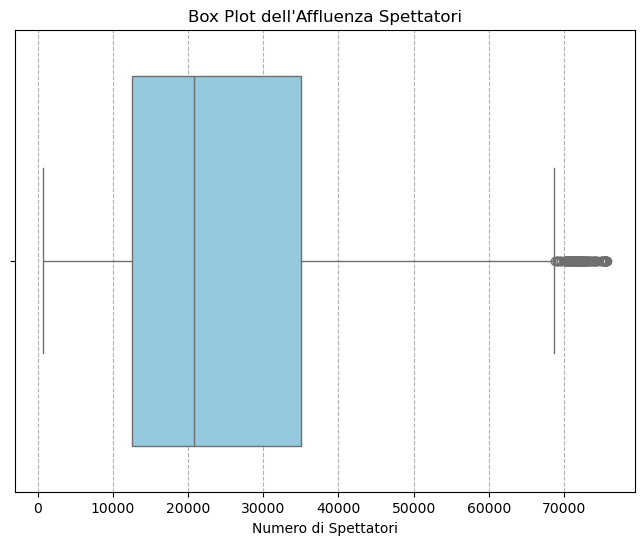

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# 'orient="h"' per un box plot orizzontale
sns.boxplot(x=Df_Partite['Spettatori'], orient="h", color='skyblue')
plt.title('Box Plot dell\'Affluenza Spettatori')
plt.xlabel('Numero di Spettatori')
plt.grid(axis='x', linestyle='--')
plt.show()

In [70]:
media_esatta = Df_Partite['Spettatori'].mean()

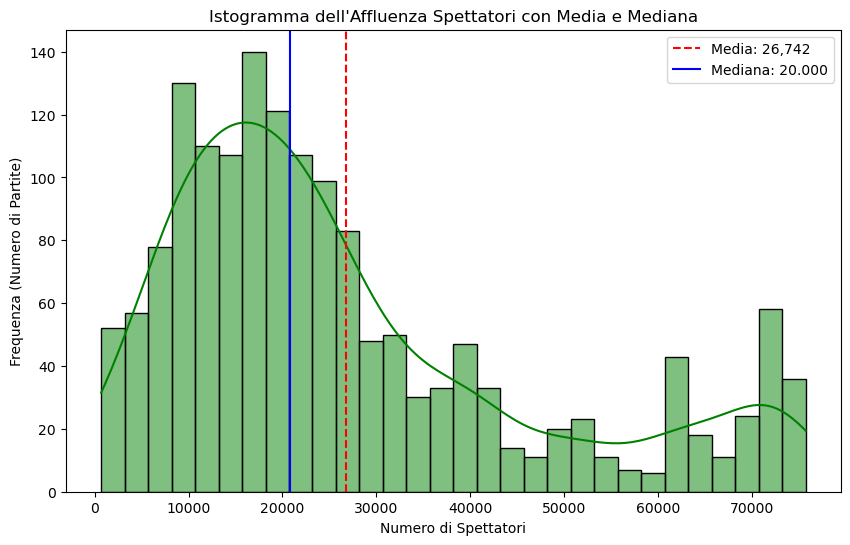

In [71]:
plt.figure(figsize=(10, 6))
# kde=True aggiunge una linea di densità per rendere più chiara la forma
sns.histplot(Df_Partite['Spettatori'], bins=30, kde=True, color='green')
plt.axvline(x=media_esatta, color='red', linestyle='--', label=f'Media: {media_esatta:,.0f}')
plt.axvline(x=df['Spettatori'].median(), color='blue', linestyle='-', label='Mediana: 20.000')
plt.title('Istogramma dell\'Affluenza Spettatori con Media e Mediana')
plt.xlabel('Numero di Spettatori')
plt.ylabel('Frequenza (Numero di Partite)')
plt.legend()
plt.show()

Il dataset è fortemente asimmetrico, pertanto come si evince dal grafico utilizziamo la mediana come indice di sostituzione per i valori mancanti.

In [73]:
Df_Partite.loc[Df_Partite['Spettatori'].isna(), 'Spettatori'] = Df_Partite['Spettatori'].median()

Verifichiamo di aver effettuato per bene i passaggi e di non avere più valori Spettattori nulli.

In [81]:
Df_Partite[Df_Partite['Spettatori'].isna()]

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Report_Partita,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite


In [125]:
#Ultima verifica per controllare di avere effettivamente zero valori nulli
Df_Partite.isnull().sum()

Data                                  0
Ora                                   0
Competizione                          0
Giornata                              0
Giorno_Settimana                      0
Sede                                  0
Risultato                             0
Gol_Fatti_Casa                        0
Gol_Subiti_Casa                       0
Pronostico_Goals_Fatti_Casa           0
Pronostico_Goals_Subiti_Casa          0
Possesso_Palla_Casa                   0
Spettatori                            0
Capitano_Casa                         0
Formazione_Casa                       0
Formazione_Avversaria                 0
Arbitro                               0
Report_Partita                        0
Tiri_Totali_Casa                      0
Tiri_in_Porta_Casa                    0
Distanza_Tiri_Media_Casa              0
Calci_Punizione_Casa                  0
Rigori_Segnati_Casa                   0
Rigori_Tentati_Casa                   0
Stagione                              0


#### Dopo un'ultima verifica eliminiamo anche la colonna Report_Partita perchè risulta inutile.

In [242]:
Df_Partite.drop(columns=['Report_Partita'], inplace=True)

In [245]:
Df_Partite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Data                                1951 non-null   datetime64[ns]
 1   Ora                                 1951 non-null   object        
 2   Competizione                        1951 non-null   object        
 3   Giornata                            1951 non-null   object        
 4   Giorno_Settimana                    1951 non-null   object        
 5   Sede                                1951 non-null   object        
 6   Risultato                           1951 non-null   object        
 7   Gol_Fatti_Casa                      1951 non-null   float64       
 8   Gol_Subiti_Casa                     1951 non-null   float64       
 9   Pronostico_Goals_Fatti_Casa         1951 non-null   float64       
 10  Pronostico_Goals_Subiti_

In [247]:
nome_file = 'SerieA_Pulito_PartiteSingole.csv'

Df_Partite.to_csv(nome_file, index=False)

print(f"DataFrame salvato con successo in: {nome_file}")

DataFrame salvato con successo in: SerieA_Pulito_PartiteSingole.csv
